In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.chdir(r'C:\Users\hp\Videos\Step1-fixedDistance_avg,std\Folders\2016-11-22-14-09-37-Joao_onlythermalthermal_image-txt')

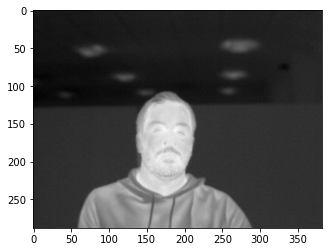

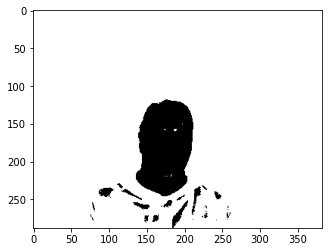

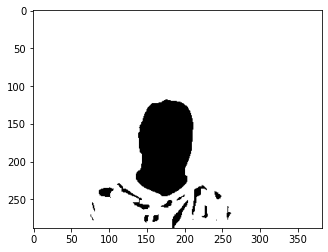

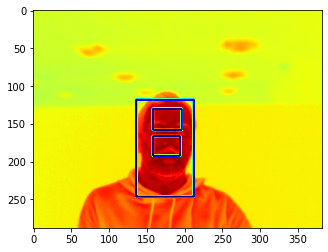

In [3]:
count = 0
forehead_vals = np.array([])
nose_vals = np.array([])
forehead_avg = np.array([])
nose_avg = np.array([])

for idx,i in enumerate(glob.glob('*.txt')):
    # threshold image
    # ret, threshed_img = cv2.threshold(text, 127, 255, cv2.THRESH_BINARY)
    text = np.loadtxt(i) #the text file of the image
    plt.imshow(text, cmap='gray')
    plt.show()
    
    face = np.where((text < 32) | (text > 37.0), 0, 255).astype(np.uint8)
    plt.imshow(face, cmap='binary')
    plt.show()
               
    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(face, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closing, cmap='binary')
    plt.show()
    
    # find contours and get the external one
    threshed_img = closing.copy()

    img = text.copy()

    contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



    #image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
    #                cv2.CHAIN_APPROX_SIMPLE)

    # with each contour, draw boundingRect in green
    # a minAreaRect in red and
    # a minEnclosingCircle in blue
    for c in contours[-1:]:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        # draw a green rectangle to visualize the bounding rect

        face = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        xmin_forehead = int(x+w*0.3)
        xmax_forehead = int(x+w*0.8)

        ymin_forehead = int(y+h*0.10)
        ymax_forehead = int(y+h*0.32)

        xmin_nose = int(x+w*0.3)
        xmax_nose = int(x+w*0.77)

        ymin_nose = int(y+h*0.38)
        ymax_nose = int(y+h*0.58)


        forehead = cv2.rectangle(img, (xmin_forehead, ymin_forehead), (xmax_forehead, ymax_forehead), (0, 255, 0), 2) 
        nose = cv2.rectangle(img, (xmin_nose, ymin_nose), (xmax_nose, ymax_nose), (0, 255, 0), 2) 


        xforehead_range = np.arange(xmin_forehead, xmax_forehead +1, 1) #np.arange(158,196 +1, 1)
        yforehead_range = np.arange(ymin_forehead, ymax_forehead+1, 1)#np.arange(130,158 +1, 1)

        xnose_range = np.arange(xmin_nose, xmax_nose +1, 1)
        ynose_range = np.arange(ymin_nose, ymax_nose +1, 1)


        # get the min area rect
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        # convert all coordinates floating point values to int
        box = np.int0(box)
    plt.imshow(img, cmap='jet')   
    if idx == 0:
        break
        # draw a red 'nghien' rectangle
        # cv2.drawContours(img, [box], 0, (0, 0, 255))

        # finally, get the min enclosing circle
        # (x, y), radius = cv2.minEnclosingCircle(c)
        # convert all values to int
        # center = (int(x), int(y))
        # radius = int(radius)
        # and draw the circle in blue
        # img = cv2.circle(img, center, radius, (255, 0, 0), 2)

    # img_w_contours = cv2.drawContours(img, contours, -1, (38, 255, 0), 1)
    count+=1

In [5]:
forehead_avg

array([], dtype=float64)

In [47]:
cv2.dft(forehead_avg).min(),cv2.dft(forehead_avg).max()

(-0.4074623817288179, 3429.845154344303)

In [54]:
np.fft.fft(forehead_avg)

array([ 3.42984515e+03+0.00000000e+00j, -1.31891002e-03-9.05345386e-02j,
       -4.07462382e-01+2.91933721e-01j, -3.30931172e-01+2.76194835e-01j,
       -2.68172251e-01+2.75919582e-01j, -2.50381085e-01+2.94748585e-01j,
       -1.67751351e-01+2.76650218e-01j, -1.43015987e-01+2.53939966e-01j,
       -1.01478028e-01+2.26449475e-01j, -7.07670525e-02+1.87698995e-01j,
       -6.96540764e-02+1.66644034e-01j, -6.69412040e-02+1.42663157e-01j,
       -7.31638430e-02+1.30446878e-01j, -7.86635694e-02+1.33517375e-01j,
       -6.67479634e-02+1.35927806e-01j, -5.57826765e-02+1.26906721e-01j,
       -5.09499323e-02+1.13233276e-01j, -5.09361942e-02+1.06639928e-01j,
       -3.77895758e-02+1.00958396e-01j, -3.67122128e-02+9.13767520e-02j,
       -3.22250894e-02+8.09711035e-02j, -3.44329074e-02+6.72536727e-02j,
       -3.64752378e-02+6.55708196e-02j, -3.27718406e-02+5.51746402e-02j,
       -3.48158644e-02+5.14947831e-02j, -3.81272786e-02+3.92865487e-02j,
       -4.68181873e-02+3.45666774e-02j, -5.22080507

In [28]:
cv2.dft(nose_avg.reshape(50,2)).min(),cv2.dft(nose_avg.reshape(50,2)).max()

(-1.0608497344061827, 3554.1695909194104)

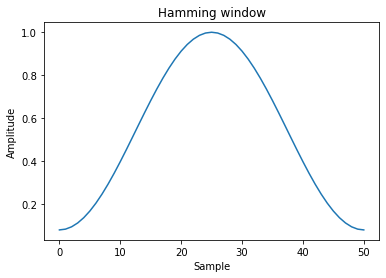

In [31]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
window = np.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

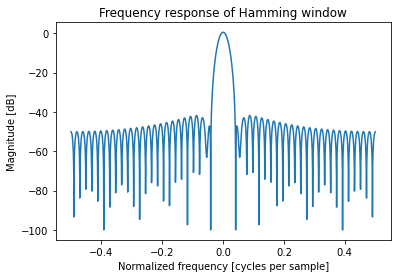

In [32]:
plt.figure()

A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)

plt.title("Frequency response of Hamming window")

plt.ylabel("Magnitude [dB]")

plt.xlabel("Normalized frequency [cycles per sample]")

plt.axis('tight')

plt.show()

In [23]:
nose_avg, forehead_avg

(array([35.44164164, 35.43598599]), array([34.22475107, 34.22203269]))

In [5]:
text = np.loadtxt('thermal1.txt') #the text file of the image
text

array([[22.7, 22.8, 22.7, ..., 23.3, 23.5, 23.5],
       [22.5, 22.8, 22.7, ..., 23.3, 23.3, 23.4],
       [22.7, 22.6, 22.5, ..., 23.5, 23.4, 23.4],
       ...,
       [23.7, 23.7, 24. , ..., 24. , 23.9, 24.1],
       [23.7, 23.7, 23.7, ..., 24.2, 24. , 24.1],
       [23.8, 23.7, 23.7, ..., 24. , 24. , 24.1]])

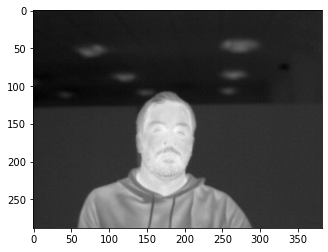

In [6]:
plt.imshow(text, cmap='gray')
plt.savefig('text.png', dpi=300, bbox_inches='tight')
plt.show()

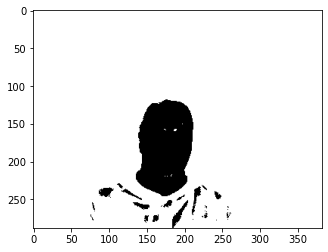

In [7]:
face = np.where((text < 32) | (text > 37.0), 0, 255).astype(np.uint8)
plt.imshow(face, cmap='binary')

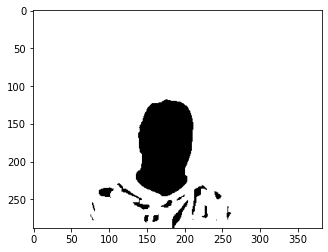

In [8]:
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(face, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='binary')

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Combined.ipynb',
 'face_boundry.png',
 'Original-Notebook-Copy1.ipynb',
 'Original-Notebook.ipynb',
 'text.png',
 'thermal1.txt',
 'thermal2.txt']

In [18]:
glob.glob('*.txt')

['thermal1.txt', 'thermal2.txt']

In [9]:
# threshold image
# ret, threshed_img = cv2.threshold(text, 127, 255, cv2.THRESH_BINARY)

# find contours and get the external one
threshed_img = closing.copy()

img = text.copy()

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



#image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
#                cv2.CHAIN_APPROX_SIMPLE)

# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
for c in contours[-1:]:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    
    face = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    xmin_forehead = int(x+w*0.3)
    xmax_forehead = int(x+w*0.8)

    ymin_forehead = int(y+h*0.10)
    ymax_forehead = int(y+h*0.32)

    xmin_nose = int(x+w*0.3)
    xmax_nose = int(x+w*0.77)

    ymin_nose = int(y+h*0.38)
    ymax_nose = int(y+h*0.58)

    xforehead_range = np.arange(xmin_forehead, xmax_forehead +1, 1) #np.arange(158,196 +1, 1)
    yforehead_range = np.arange(ymin_forehead, ymax_forehead+1, 1)#np.arange(130,158 +1, 1)

    xnose_range = np.arange(xmin_nose, xmax_nose +1, 1)
    ynose_range = np.arange(ymin_nose, ymax_nose +1, 1)
    
    
    
    forehead = cv2.rectangle(img, (xmin_forehead, ymin_forehead), (xmax_forehead, ymax_forehead), (0, 255, 0), 2) 
    nose = cv2.rectangle(img, (xmin_nose, ymin_nose), (xmax_nose, ymax_nose), (0, 255, 0), 2) 
    
    

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    # cv2.drawContours(img, [box], 0, (0, 0, 255))

    # finally, get the min enclosing circle
    # (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    # center = (int(x), int(y))
    # radius = int(radius)
    # and draw the circle in blue
    # img = cv2.circle(img, center, radius, (255, 0, 0), 2)

# img_w_contours = cv2.drawContours(img, contours, -1, (38, 255, 0), 1)

In [10]:
nose_vals.size

1998

In [11]:
forehead_vals.size

2262

In [12]:
nose_avg

array([35.44164164, 35.43598599])

In [13]:
forehead_avg

array([21.27320955, 21.28664898])

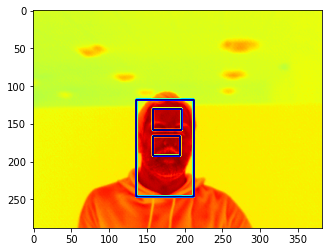

In [14]:
plt.imshow(img, cmap='jet')
plt.savefig('face_boundry.png', dpi=300, bbox_inches='tight')


In [15]:
for i in glob.glob('*.txt'):
    print(i)

thermal1.txt
thermal2.txt


In [16]:
threshed_val = np.where((text>=32) & (text<=37) , text, 0)
threshed_val[threshed_val>0].size

8669

In [17]:
forehead_vals = np.array([])

for y1 in yforehead_range:
    for x1 in xforehead_range:
        #print(x1,y1)
        #print(threshed_val[x1][y1])
        forehead_vals = np.append(forehead_vals,threshed_val[x1][y1])

In [20]:
forehead_vals

array([ 0. ,  0. ,  0. , ..., 35.8, 36. , 35.8])

In [18]:
nose_vals = np.array([])

for y2 in  ynose_range:
    for x2 in xnose_range:
        #print(x1,y1)
        #print(threshed_val[x1][y1])
        nose_vals = np.append(nose_vals, text[x2][y2])

In [19]:
forehead_avg = np.mean(forehead_vals)
nose_avg = np.mean(nose_vals)

'forehead:',forehead_avg ,'Nose:',nose_avg

('forehead:', 21.27320954907162, 'Nose:', 35.44164164164164)

### Check if it is available to make the ranges of nose and forehead equal(37, 39), y_range(27,29) respectively to make the below code

In [210]:
"""forehead_vals = np.array([])
nose_vals = np.array([])


for y1,y2 in zip(yforehead_range, ynose_range):
    for x1,x2 in zip(xforehead_range,xnose_range):
        #print(x1,y1)
        #print(threshed_val[x1][y1])
        forehead_vals = np.append(forehead_vals,threshed_val[x1][y1])
        nose_vals = np.append(nose_vals, text[x2][y2])"""

same steps for nose,
repeat same steps for 100 files with calculating the average temperature per file per nose and forehead
combine all average values for nose and forehead for 100 files in a dataframe
fourier series analysis
bas

In [35]:
os.listdir()

['.ipynb_checkpoints',
 'face_boundry.png',
 'Original-Notebook-Copy1.ipynb',
 'Original-Notebook.ipynb',
 'text.png',
 'thermal1.txt',
 'thermal2.txt']

In [39]:
file

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
glob.glob('*.txt')

['thermal1.txt', 'thermal2.txt']

In [41]:
for i in glob.glob('*.txt'):
    

thermal1.txt
thermal2.txt
